In [23]:
import numpy as np
import qtree
import networkx as nx
import matplotlib.pyplot as plt
import copy

import utils

%load_ext autoreload
%autoreload 2
%cd ..

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/dali/anl/qsim/qtree


In [61]:
def get_locale_peo(old_graph, rule):
    # This is far below computationally effective
    graph = copy.deepcopy(old_graph)
    
    path= []
    vals = []
    while graph.number_of_nodes():
        #nodes = sorted(graph.nodes, key=int)
        nodes = list(graph.nodes)
        rule_ = lambda n: rule(graph, n)
        costs = list(map(rule_, nodes))
        _idx = np.argmin(costs)
        vals.append(costs[_idx])
        node = nodes[_idx]
        path.append(node)
        qtree.graph_model.eliminate_node(graph, node)
    return path, vals


In [69]:
nqubits, circ = utils.test_circ('./test_circuits/', 6, depth=20)
graph = qtree.graph_model.circ2graph(nqubits, circ)

2020-03-01 23:29:48,009- INFO•	reading file ./test_circuits//inst/cz_v2/6x6/inst_6x6_20_0.txt
2020-03-01 23:29:48,013- INFO•	There are 36 qubits in circuit
2020-03-01 23:29:48,028- INFO•	Generated graph with 268 nodes and 483 edges


In [78]:
def profile_grpaph(graph):
    peo, tw = qtree.graph_model.get_peo(graph)
    print(tw)
    graph_opt, _ = utils.reorder_graph(graph, peo)

    #-
    fig, axs = plt.subplots(1, 2, figsize=(15,5))
    plt.sca(axs[0])
    plt.title('Original ')
    nx.draw_kamada_kawai(graph, node_size=20, with_labels=True)
    plt.sca(axs[1])
    plt.title('Reordered ')
    nx.draw_kamada_kawai(graph_opt, node_size=20, with_labels=True)

    mems, flops = qtree.graph_model.cost_estimator(graph)
    mems_opt, flops_opt = qtree.graph_model.cost_estimator(graph_opt)

    npeo, nghs = get_locale_peo(graph, utils.n_neighbors)
    graph_opt_loc, _ = utils.reorder_graph(graph, npeo)
    mems_loc, flops_loc = qtree.graph_model.cost_estimator(graph_opt_loc)

    #-
    f, axs = plt.subplots(1, 3, sharey=True, figsize=(15,4))
    plt.sca(axs[0])
    plt.title('Unchanged order')
    utils.plot_cost(mems, flops)

    plt.sca(axs[1])
    plt.title('Quickbb')
    utils.plot_cost(mems_opt, flops_opt)

    plt.sca(axs[2])
    plt.title('Local ordering:')
    utils.plot_cost(mems_loc, flops_loc)

    nodes, ngh_loc = utils.get_neighbours_path(graph_opt_loc)
    nodes, ngh = utils.get_neighbours_path(graph_opt)

    print(f'local: {max(ngh_loc)}, quickbb: {max(ngh)}')
    plt.figure()
    #-
    plt.plot(nodes, ngh_loc, label=f'Node degree:  sum={sum(ngh_loc)}')
    plt.plot(nodes, ngh, label=f'Quickbb: sum={sum(ngh)}')
    plt.grid()
    plt.legend()

2020-03-01 23:37:11,047- INFO•	generating config file output/quickbb.80160975.cnf
2020-03-01 23:37:11,048- INFO•	excecuting quickbb: ./quickbb/quickbb_64  --min-fill-ordering --time 60 --cnffile output/quickbb.80160975.cnf 


14


/usr/lib/python3.8/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


local: 16, quickbb: 17


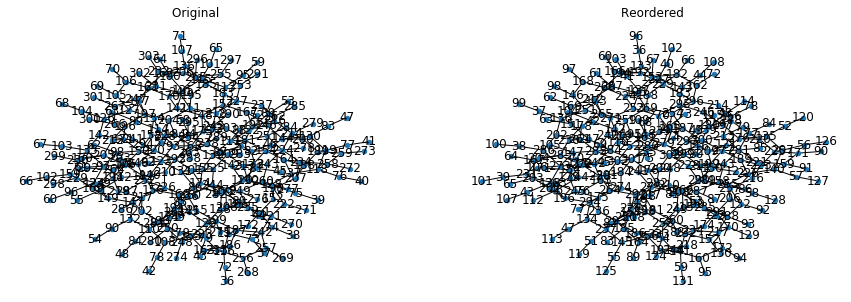

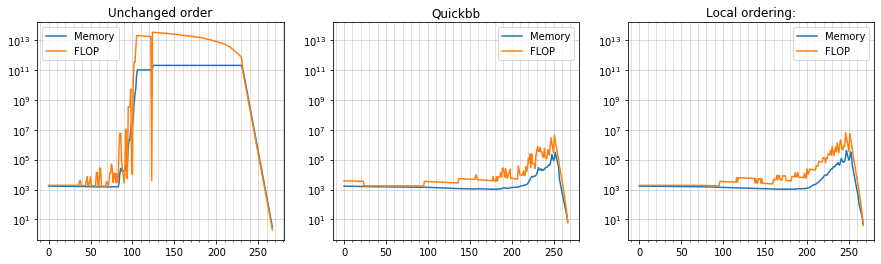

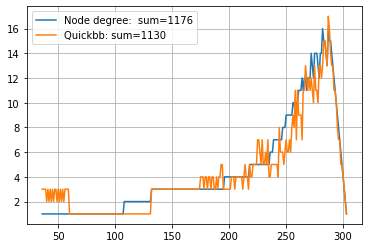

In [79]:
nqubits, circ = utils.test_circ('./test_circuits/', 6, depth=20)
graph = qtree.graph_model.circ2graph(nqubits, circ)

profile_grpaph(graph)

In [ ]:
nqubits, circ = utils.test_circ('./test_circuits/', 6, depth=20)
graph = qtree.graph_model.circ2graph(nqubits, circ)

profile_grpaph(graph)

2020-03-01 23:37:11,047- INFO•	generating config file output/quickbb.80160975.cnf
2020-03-01 23:37:11,048- INFO•	excecuting quickbb: ./quickbb/quickbb_64  --min-fill-ordering --time 60 --cnffile output/quickbb.80160975.cnf 
